<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep30/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter = ',').T
x=data[0]
y=data[1]

Mounted at /content/drive


In [3]:
x=(x-np.mean(x))/np.std(x)


$$P(\vec{\omega}|Data)\propto \ell (Data|\vec{\omega})Pr(\vec{\omega})$$

$$ln L \propto -0.5 \sum_i(y_i-Model(x_i,\vec{\omega})^2$$

#no infomativo

$$pr(\theta)=\frac{1}{\theta_{max}-\theta_{min}}$$

#informativos

$$Pr(\theta)\propto e^{(\theta -\mu_\theta)^2/2\sigma^2_\theta}$$

$f=w_0+w_1x$ parametros libre $w_0,w_1$

$\sigma$

* 1) $\theta_{ini}=[]$
* 2) $\theta_{prop}=[gaussian(\theta_ini[0],\sigma),gaussian(\theta_ini[1],\sigma)]$
* 3) Evaluar $ln Post(\theta_{ini}), ln Post (theta_{prop})$
  * si $ln Post(\theta_{prop})>ln Post (theta_{ini})$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
  * si no :
  * post= uniform (0,1)
  * si $ln post(\theta_{prop}) - ln post(\theta_{ini})> ln post(post)$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
    * $\theta_{ini}= \theta_{prop}$


In [4]:
#modelo lienal
def model(x,theta):
  f = 0.0
  for i in range(len(theta)):
    f+= theta[i]*x**i
  return f

#prior
def prior(lim,theta):
  if lim[0,1]> theta[0] >lim[0,0] and lim[1,1]> theta[1] >lim[1,0]:
    pr=1
  else:
    pr=0
  return pr

#likelihood
def likelihood(x,y,theta, model):
  lnL=0.0
  for i in range(len(x)):
    lnL += -0.5*(y[i]-model(x[i],theta))**2
  return lnL

#Monte Carlo Markov Chain Metropolis Algorithm
# Cadenas de Markov Algoritmo Metropolos
def CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model):
  # distribucion de theta
  dist_theta=[]
  dist_theta.append(theta)
  for i in range(iter):
    theta_prop=[np.random.normal(theta[0],sigma0),np.random.normal(theta[1],sigma1)]
    lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))
    lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))
    if lim[0,1]> theta_prop[0] >lim[0,0] and lim[1,1]> theta_prop[1] >lim[1,0]:
      # lnPost= ln L + ln Pr


      if lnPost_prop > lnPost_ini:
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')

      elif lnPost_prop - lnPost_ini > np.log(np.random.uniform(0,1)):
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')


  return dist_theta

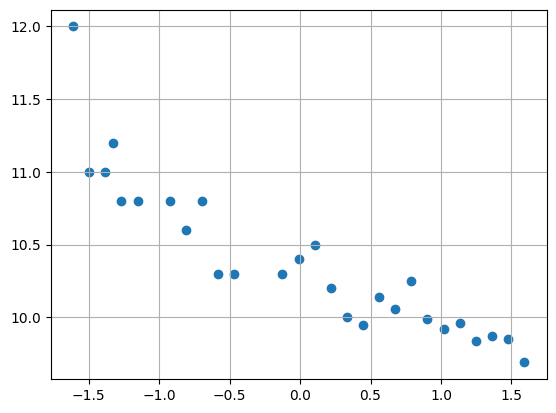

In [5]:
plt.scatter(x,y)
plt.grid()

In [6]:
w0=4.0
w1=-2.0
sigma0=0.22
sigma1=0.25
#iteracion
iter=10000
lim= np.asmatrix([[-15,15],[-15,15]])
theta=[w0,w1]
theta2=[13,-2]
#numero de pruebas
n = 4

In [7]:
np.random.seed(123)

In [8]:
# distribucion
muestreo=[]
for i in range(n):
  theta=[theta[0]+np.random.uniform(-5,5),theta[1]+np.random.uniform(-5,5)]
  dis_theta=CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model)
  dis_theta=np.array(dis_theta).T
  #print(dis_theta)
  muestreo.append(dis_theta)

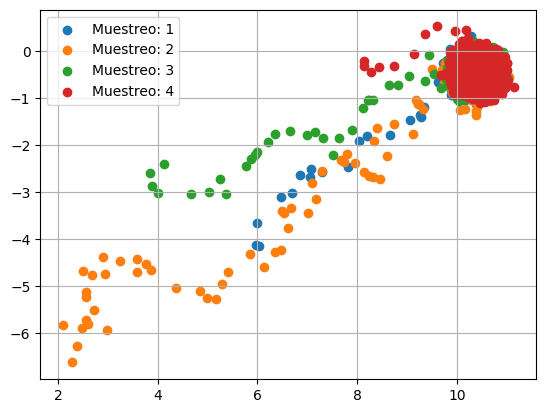

In [9]:
for i in range(len(muestreo)):
  plt.scatter(muestreo[:][i][0],muestreo[:][i][1],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()

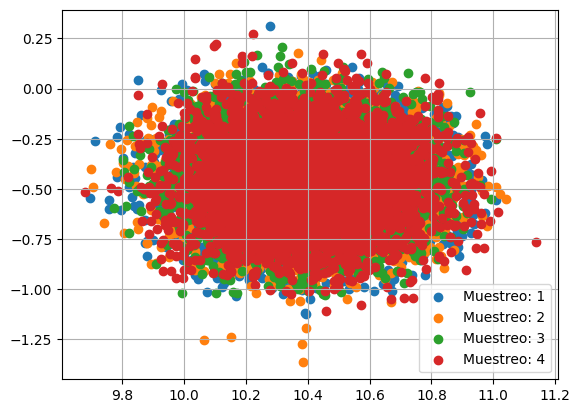

In [10]:
for i in range(len(muestreo)):
  plt.scatter(muestreo[i][0][100:],muestreo[i][1][100:],label=f'Muestreo: {i+1}')
plt.legend()
plt.grid()


In [39]:
RA=len(dis_theta.T)/iter
RA

0.4904

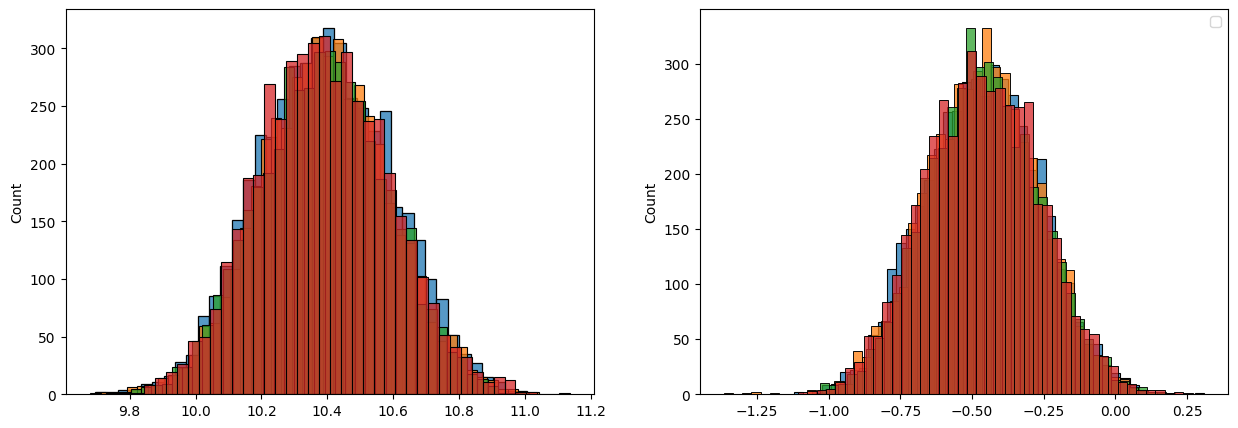

In [14]:
fig, ax= plt.subplots(1,2, figsize=(15,5))
for i in range(2):
  for j in range(len(muestreo)):
    sns.histplot ( ax=ax[i] , x=muestreo[j][i][100:])
plt.legend()


In [57]:
test=[]
temp=[]
for i in muestreo:
  for j in i:
    temp.append(j[100:])
  test.append(temp)
  temp=[]
test

[[array([10.54378427, 10.21302342, 10.28157135, ..., 10.32348735,
         10.28798754, 10.55087442]),
  array([-0.29588184, -0.35397118, -0.38948387, ..., -0.71415006,
         -0.89145134, -0.81756638])],
 [array([10.27464564, 10.28110307, 10.22082234, ...,  9.85593116,
          9.87018115, 10.02471597]),
  array([-0.66510444, -0.63212071, -0.61173576, ..., -0.37576343,
         -0.51096064, -0.87410458])],
 [array([10.56849201, 10.72927694, 10.42515799, ..., 10.79816358,
         10.82251362, 10.51738551]),
  array([-0.52406662, -0.55041362, -0.66168717, ..., -0.36220884,
         -0.41315328, -0.36732545])],
 [array([10.59883399, 10.48044249, 10.68102571, ..., 10.17446725,
          9.92953788,  9.92383228]),
  array([-0.2555468 , -0.32960978, -0.29297291, ..., -0.49635688,
         -0.18687123, -0.49558823])]]

# Diagnostico de Gelman-Rubin

$S_{i}^2=\frac{1}{n-1}∑_{t=1}^n(X_{it}-\bar{X}_i)^2$

$S^2=\frac{1}{m}\sum_{i=1}^ms_i^2$

In [58]:

ss=0.0
for j in test:
  ss += np.sum((j[0]-np.mean(j[0]))**2)/(len(j[0])-1)
ss=ss*(1/len(muestreo))
ss

0.03878566148697345

In [59]:
overall=[]
for i in test:
  for j in i[0]:
    overall.append(j)
len(overall)


18784

In [60]:
mean=[]
for i in test:
  mean.append(np.mean(i[0]))
mean

[10.392602898873484, 10.390597042705677, 10.3863475574149, 10.38902883202054]

$\frac{B}{N}=\frac{1}{m-1}\sum_{i=1}^m(\bar{X}_i-\hat{\mu})^2$

In [63]:
Suma=0
for i in range(len(mean)):
  Suma += (mean[i]-np.mean(overall))**2
B_N=(1/(5-1))*Suma
B_N

5.227084939122425e-06

$\hat{\sigma}^2=\frac{n-1}{n}s^2+\frac{B}{n}$

In [66]:
n=len(test[0][0])

In [71]:
sig=((n-1)/n)*ss+B_N
sig

0.03878259926618763

In [72]:
R=np.sqrt(sig/ss)
R

0.9999605230243186